These libraries help us fetch financial data, manipulate it, and visualize the results

In [1]:
!pip install yfinance


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Fetch and prepare SPY data

We'll get SPY data for the last 5 years and calculate its daily returns.

In [3]:
spy = yf.Ticker("SPY")
data = spy.history(period="5y")
returns = data['Close'].pct_change().dropna()
log_returns = np.log(returns+1.0)

In [18]:
returns.shape, log_returns.shape

((1256,), (1256,))

In [4]:
data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2020-05-04 00:00:00-04:00,261.026210,263.964316,259.529279,263.657501,80873200,0.0,0.0,0.0
2020-05-05 00:00:00-04:00,266.511918,268.938628,263.787643,266.093506,79569900,0.0,0.0,0.0
2020-05-06 00:00:00-04:00,267.813605,268.204096,263.852737,264.289734,73632600,0.0,0.0,0.0
2020-05-07 00:00:00-04:00,267.544004,269.431455,266.967545,267.478912,75250400,0.0,0.0,0.0
2020-05-08 00:00:00-04:00,270.649455,272.378860,269.505817,271.904663,76452400,0.0,0.0,0.0


<Axes: xlabel='Date'>

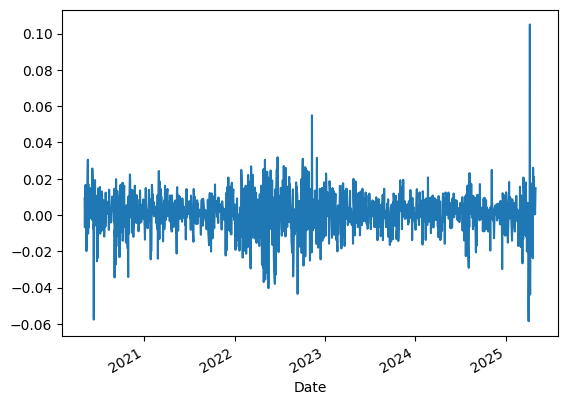

In [5]:
returns.plot()

<Axes: xlabel='Date'>

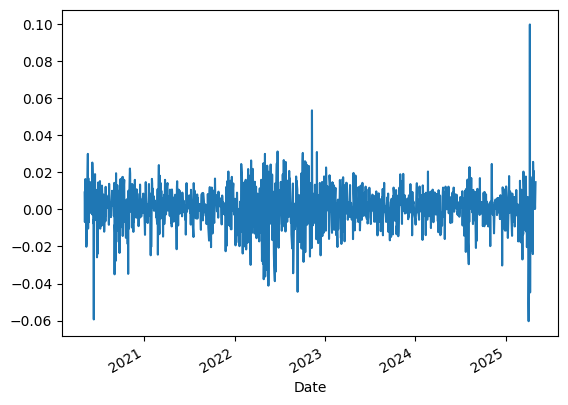

In [6]:
log_returns.plot()

We use yfinance to download SPY stock data for the past 5 years. Then, we calculate the daily percentage change in closing prices. This gives us the daily returns. We remove any missing values to ensure our data is clean and ready for analysis.

### Calculate distribution statistics

Now we'll compute the skewness and kurtosis of the returns.

In [7]:
rtn = returns
mean = rtn.mean()
std = rtn.std()
skewness = rtn.skew()
kurtosis = rtn.kurtosis()

print(f"Mean: {mean:.4f}")
print(f"Std: {std:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

Mean: 0.0007
Std: 0.0113
Skewness: 0.0931
Kurtosis: 7.8542


In [8]:
rtn = log_returns
mean = rtn.mean()
std = rtn.std()
skewness = rtn.skew()
kurtosis = rtn.kurtosis()

print(f"Mean: {mean:.4f}")
print(f"Std: {std:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

Mean: 0.0006
Std: 0.0113
Skewness: -0.0650
Kurtosis: 7.0384


We calculate two important measures of the returns distribution. Skewness tells us about the symmetry of the distribution. Kurtosis gives us information about the tails of the distribution. These values help us understand how the returns are distributed compared to a normal distribution.

### Visualize the distribution

Let's create a histogram of the returns and overlay a normal distribution for comparison.

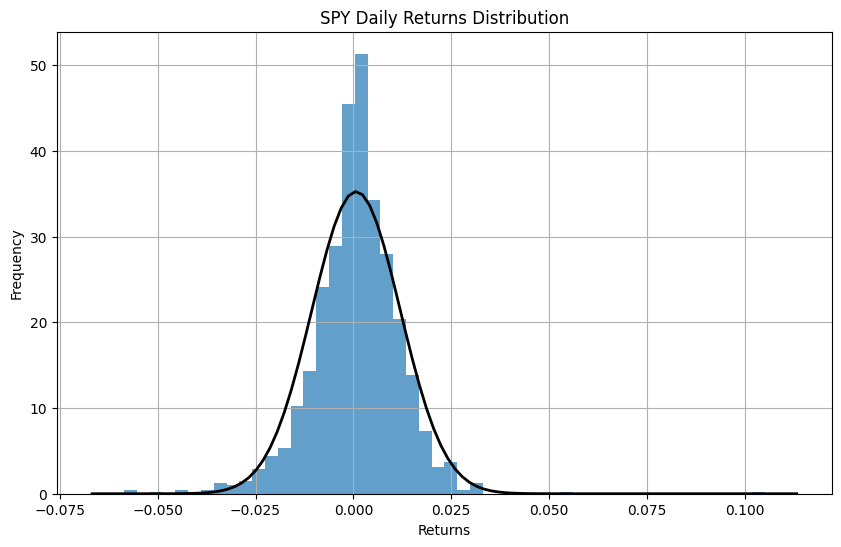

In [9]:
plt.figure(figsize=(10, 6))
returns.hist(bins=50, density=True, alpha=0.7)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, returns.mean(), returns.std())
plt.plot(x, p, 'k', linewidth=2)
plt.title("SPY Daily Returns Distribution")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()

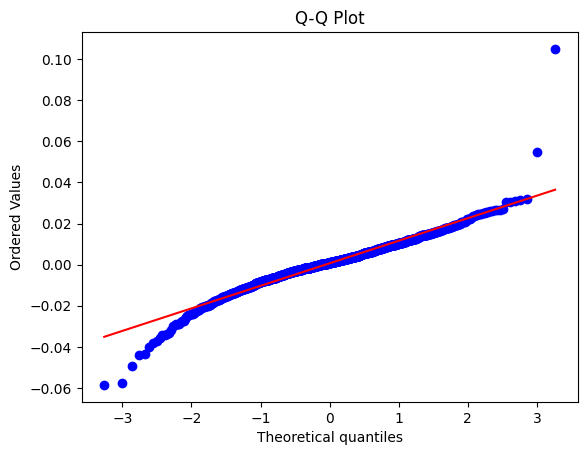

In [11]:
stats.probplot(returns, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

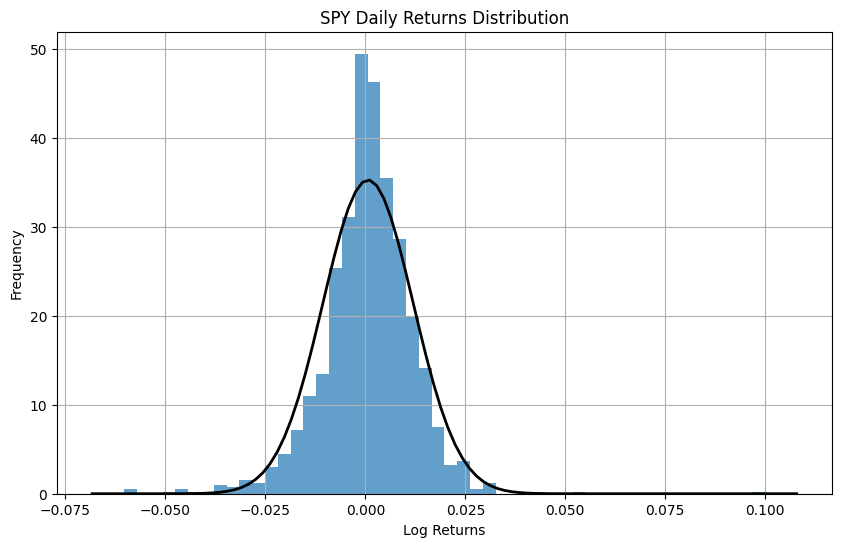

In [12]:
plt.figure(figsize=(10, 6))
log_returns.hist(bins=50, density=True, alpha=0.7)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, returns.mean(), returns.std())
plt.plot(x, p, 'k', linewidth=2)
plt.title("SPY Daily Returns Distribution")
plt.xlabel("Log Returns")
plt.ylabel("Frequency")
plt.show()

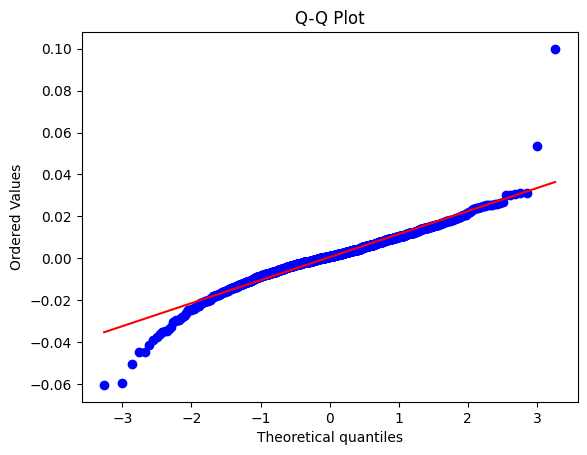

In [15]:
stats.probplot(log_returns, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

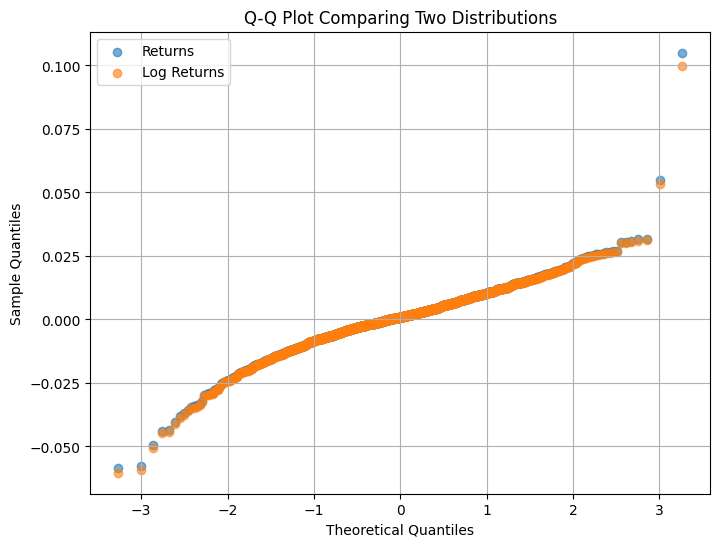

In [35]:
# Compute Q-Q points
osm1, osr1 = stats.probplot(returns.values, dist="norm", fit=False)[:2]
osm2, osr2 = stats.probplot(log_returns.values, dist="norm", fit=False)[:2]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(osm1, osr1, label='Returns', alpha=0.6)
plt.scatter(osm2, osr2, label='Log Returns', alpha=0.6)

plt.title("Q-Q Plot Comparing Two Distributions")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.legend()
plt.grid(True)
plt.show()

We create a histogram of the returns to visually represent their distribution. We set the number of bins to 50 for a detailed view. We also calculate and plot a normal distribution curve using the mean and standard deviation of our returns. This allows us to compare our actual returns distribution to what a normal distribution would look like.

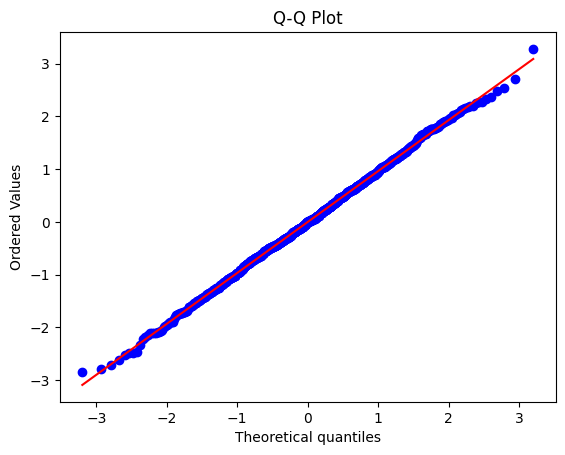

In [33]:
normal = np.random.normal(0, 1, size=1000)
stats.probplot(normal, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

About Q-Q plot: https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot#Definition_and_construction

On that note, what does the linear regression in a Q-Q plot tells us about the relationship between both distributions?
* Assume we have 2 random variables $X_1, X_2$ on $\mathbb{R}$ that are an affine transformation of one another, i.e., $X_2 = a X_2 + b$ (assume $a > 0$).
* Then their cdf's are related via the following transformation $F_2(x) = \mathbb{P}[X_2 \leq x] = \mathbb{P}[X_1 \leq (x-b)/a] = F_1((x-b)/a)$
* And their quantile functions, or inverse cdf's, are related by the transformation $Q_2(q) = x \Leftrightarrow q = F_2(x) \Leftrightarrow q = F_1((x-b)/a) \Leftrightarrow x = a Q_1(q) + b$

That is, if $X_2 = a X_1 + b$, then $Q_2(q) = a Q_1(q) + b$.
That also tells us that when doing a linear regression on a Q-Q plot, 
* the **slope** $a$ tells us how both distributions scale with each other, since $\sigma(X_2) = a \sigma(X_1)$.
* and the **y-intercept** $b$ tells us about the shift, since $\mathbb{E}[X_2] = |a| \mathbb{E}[X_1] + b$.

Side note, since $F(x) = \int_{-\infty}^x f(x) dx$ (or $f(x) = dF(x)/fx$), we have $f_2(x) = \frac1a f_1((x-b)/a)$.

More reading on normality of returns and log-returns: https://gregorygundersen.com/blog/2022/02/06/log-returns/.
In particular, a clear explanation of cumulative returns in the case we are compounding or maitaining a fixes portfolio size (rebalancing).